In [29]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation

# Configure Jupyter Notebook for inline plotting
%matplotlib inline


In [31]:
data = {
    'Size': np.random.randint(800, 3500, 100),  # Size in square feet
    'Bedrooms': np.random.randint(1, 5, 100),  # Number of bedrooms
    'Age': np.random.randint(1, 50, 100),  # Age in years
    'Location': np.random.choice(['City Center', 'Suburbs', 'Rural'], 100),  # Categorical location
    'Price': np.random.randint(100000, 1000000, 100)  # Price in dollars
}

df = pd.DataFrame(data)

df.head()


,Size,Bedrooms,Age,Location,Price
0,1944,4,7,City Center,752000
1,2092,3,10,City Center,474246
2,2333,1,49,City Center,324283
3,3033,4,21,Rural,186382
4,2413,3,1,City Center,395574


In [33]:
df.isnull().sum()

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.head()


,Size,Bedrooms,Age,Price,Location_Rural,Location_Suburbs
0,1944,4,7,752000,False,False
1,2092,3,10,474246,False,False
2,2333,1,49,324283,False,False
3,3033,4,21,186382,True,False
4,2413,3,1,395574,False,False


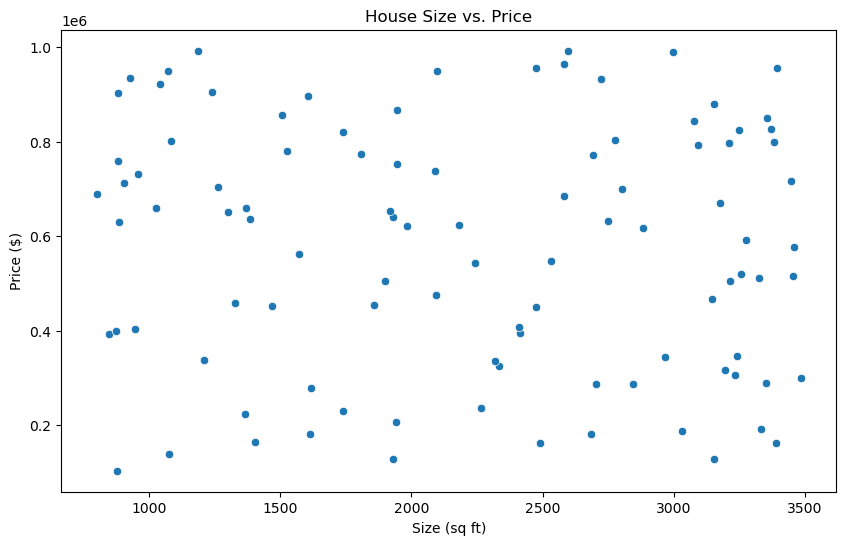

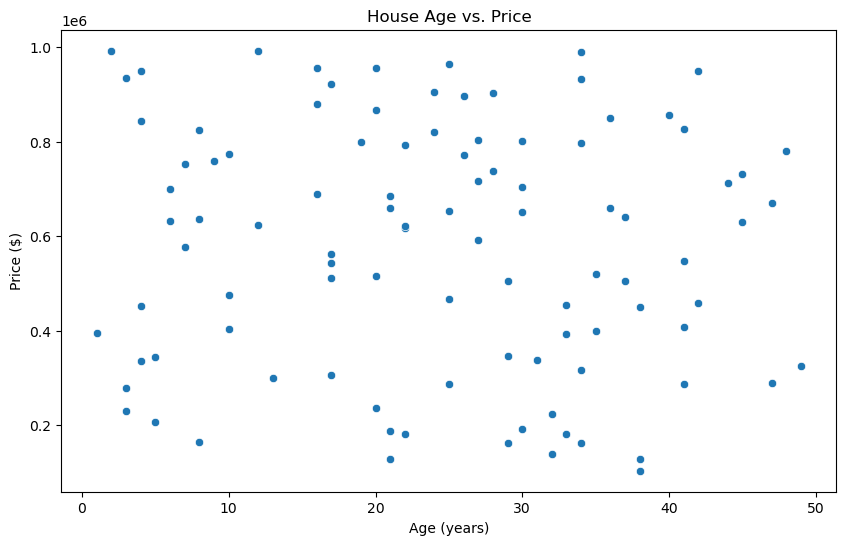

In [35]:
# Plot Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Price', data=df)
plt.title('House Size vs. Price')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.show()

# Plot Age vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('House Age vs. Price')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')
plt.show()


In [37]:
# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error (MSE): 54152745519.33
Mean Absolute Error (MAE): 195298.64
R-squared: -0.11
